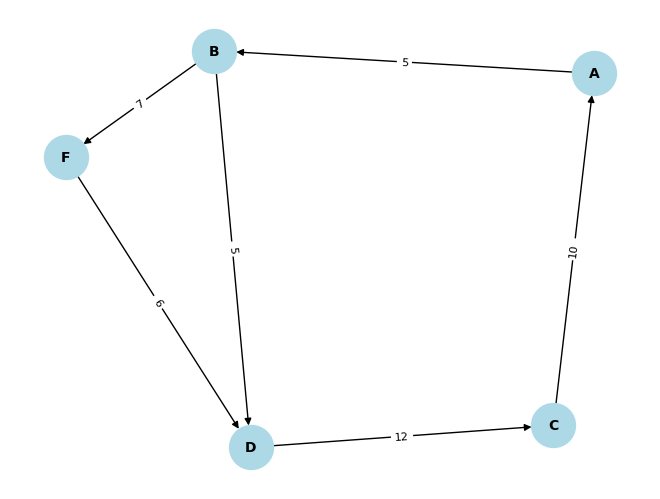

Saldos:
Alberto: ** +R$5
Beltrano: ** -R$7
Ciclano: +R$2
Fulana: +R$1
Deltrana: -R$1

Matriz de Adjacência:
[[ 0  5  0  0  0]
 [ 0  0  0  5  7]
 [10  0  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  6  0]]


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Definindo os empréstimos
emprestimos = {
    ('Alberto', 'Beltrano'): 5,
    ('Ciclano', 'Alberto'): 10,
    ('Beltrano', 'Fulana'): 7,
    ('Fulana', 'Deltrana'): 6,
    ('Beltrano', 'Deltrana'): 5,
    ('Deltrana', 'Ciclano'): 12
}

# Criando o grafo
G = nx.DiGraph()

# Adicionando vértices e arestas com pesos
for (devedor, credor), valor in emprestimos.items():
    G.add_edge(devedor[0], credor[0], weight=valor)

# Plotando o grafo
pos = nx.spring_layout(G, seed=42)  # Definindo a posição dos vértices
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_weight='bold', font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.show()

# Calculando os saldos de cada pessoa
saldos = {}
for (devedor, credor), valor in emprestimos.items():
    saldos[devedor] = saldos.get(devedor, 0) - valor
    saldos[credor] = saldos.get(credor, 0) + valor

# Imprimindo os saldos
print("Saldos:")
for pessoa, saldo in saldos.items():
    if saldo == max(saldos.values()):
        saldo_str = f"** +R${abs(saldo)}" if saldo > 0 else f"** -R${abs(saldo)}"
    elif saldo == min(saldos.values()):
        saldo_str = f"** +R${abs(saldo)}" if saldo > 0 else f"** -R${abs(saldo)}"
    else:
        saldo_str = f"+R${abs(saldo)}" if saldo > 0 else f"-R${abs(saldo)}"
    print(f"{pessoa}: {saldo_str}")

# Matriz de adjacência
adj_matrix = nx.adjacency_matrix(G, nodelist=sorted(G.nodes)).todense()
print("\nMatriz de Adjacência:")
print(adj_matrix)